# Практическая работа №6.
Модели соперничества  
Вариант 9

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Задание 1
Исследование особых точек системы модели Лотки


---



$\begin{cases} \frac{dx}{dt}=k_1ax-k_2xy,\\ \frac{dy}{dt}=k_2xy-k_3y. \end{cases}$  
$\text{Стационарные точки: } A_1=(0,0),A_2=\left(\frac{k_3}{k_2}, \frac{k_1a}{k_2} \right)$

Рассмотрим тип второй стационарной точки с помощью первого приближения в её окрестности  
$\xi=x-\frac{k_3}{k_2}, \eta=y-\frac{k_1a}{k_2}$  
$\begin{cases}
   \frac{d\xi}{dt}=-k_3\eta,\\
   \frac{d\eta}{dt}=k_1a\xi.
\end{cases}$  
$|A-\lambda E| = \begin{vmatrix}
-\lambda & -k_3 \\
k_1a & -\lambda
\end{vmatrix}=\lambda^2+k_1k_3a$  
$\lambda=\pm i\sqrt{k_1k_3a}$  
Каждый хар. число чисто мнимое, поэтому тип стационарной точки - центр. Вблизи стационарной точки фазовые траектории - эллипсы

In [ ]:
def euler_cauchy_system(T0, T, N, x0, y0, a, k1, k2, k3):
    time = np.linspace(T0, T, N)
    tau = time[1] - time[0]

    res = np.zeros((3, N))
    res[0] = time              # Моменты времени
    res[1, 0] = x0             # Начальная конц. x
    res[2, 0] = y0             # Начальная конц. y

    x_prev = x0
    y_prev = y0
    for i in range(1, N):
        f_prev = k1*a*x_prev - k2*x_prev*y_prev
        g_prev = k2*x_prev*y_prev - k3*y_prev

        x_pred = x_prev + tau * f_prev
        y_pred = y_prev + tau * g_prev

        f_pred = k1*a*x_pred - k2*x_pred*y_pred
        g_pred = k2*x_pred*y_pred - k3*y_pred

        x = x_prev + tau * 0.5 * (f_prev + f_pred)
        y = y_prev + tau * 0.5 * (g_prev + g_pred)

        res[1, i] = x
        res[2, i] = y

        x_prev, y_prev = x, y

    return res

In [ ]:
a = 1.0
k1 = 1.0
k2 = 1.0
k3 = 1.0

x0 = 1.5
y0 = 1.0

T0 = 0
T = 20
N = 2000

In [ ]:
t, x, y = euler_cauchy_system(T0, T, N, x0, y0, a, k1, k2, k3)

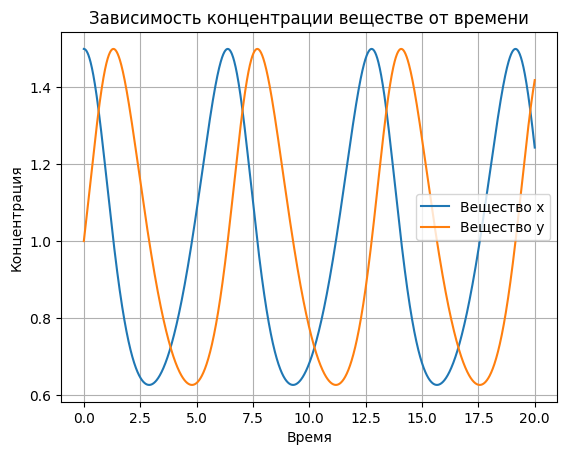

In [ ]:
plt.plot(t, x, label="Вещество x")
plt.plot(t, y, label="Вещество y")

plt.xlabel('Время')
plt.ylabel('Концентрация')
plt.title('Зависимость концентрации вещества от времени')
plt.grid()
plt.legend()

plt.show()

In [ ]:
a = 1.0
k1 = 1.0
k2 = 1.0
k3 = 1.0

x0_values = [1.05, 1.1, 1.2, 1.3, 1.5, 1.6]
y0_values = [1.02, 1.0, 1.1, 1.2, 1.4, 1.5]

T0 = 0
T = 20
N = 2000

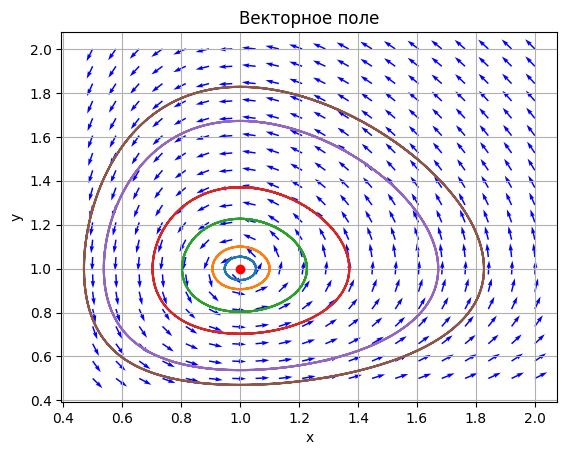

In [ ]:
t = np.linspace(T0, T, N)

for i in range(len(x0_values)):
    x0 = x0_values[i]
    y0 = y0_values[i]
    _, x, y = euler_cauchy_system(T0, T, N, x0, y0, a, k1, k2, k3)
    plt.plot(x, y)

plt.plot(k3/k2, k1*a/k2, 'ro')


x = np.linspace(0.5, 2, 20)
y = np.linspace(0.5, 2, 20)
X, Y = np.meshgrid(x, y)

U = k1 * a * X - k2 * X * Y
V = k2 * X * Y - k3 * Y

norm = np.sqrt(U**2 + V**2)
U /= norm
V /= norm

plt.quiver(X, Y, U, V, color='blue')


plt.xlabel('x')
plt.ylabel('y')
plt.title('Векторное поле')
plt.grid()

plt.show()

# Задание 2
Логистическая модель

$\frac{dP}{dt}=(\alpha-\beta)P(t)$  
$\alpha<\beta \Rightarrow k=\beta-\alpha>0$  
$\frac{dP}{dt}=-kP(t) \Rightarrow P(t)=P_0e^{-kt}$

$\text{В силу того, что }e^{-kt}\to 0, t \to \infty \text{  и }P_0 \text{ - данное число, } P_0e^{-kt}\to 0, t \to \infty. \text{То есть, происходит исчезновение.}$

# Задание 3  
Диаграмма бифуркации  

$\frac{dx}{dt}=\frac{1}{10}x(x-50)+s$  
$x(t)=\frac{N(x_0-H)-H(x_0-N)e^{\frac{(N-H)t}{10}}}{(x_0-H)-e^\frac{t(H-N)}{10}(x_0-N)}$  
$N, H=100\pm\sqrt{(80*123s)}$

$f(x)=\frac{1}{10}x(x-50)+s$  
$f(x) = 0 \Leftrightarrow x^2-50x+10s=0$  
$D=2500-40s$  


$\text{Количество т. равновесия =}
\left\{
    \begin{array}{l}
        2 &D > 0\\
        1 &D = 0 \\
        0 &D < 0 \\
    \end{array}
\right.$  


$s: D = 1 \text{- точка бифуркции. } s = 62.5$

Построим диаграмму бифуркации:  
$H, N=25\pm \sqrt{(625 - 10s)}$  
$c=25\pm \sqrt{(625 - 10s)}$  
$(c-25)^2=625-10s$  
$s=\frac{(625-(c-25)^2)}{10}$

In [ ]:
def s(c):
    return (625 - (c - 25) ** 2) / 10

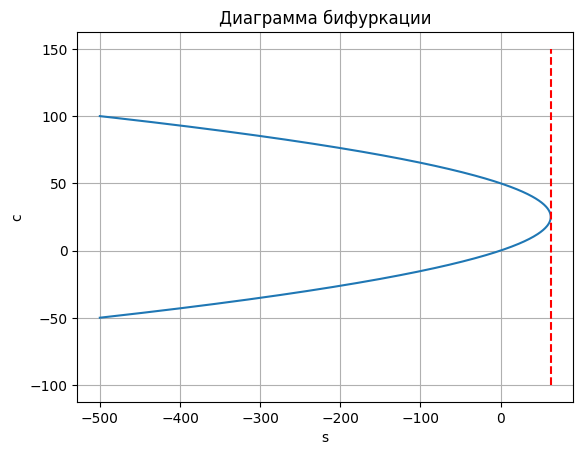

In [ ]:
c = np.linspace(-50, 100, 500)

plt.plot(s(c), c)
plt.vlines(62.5, -100, 150, "red", "dashed")

plt.title("Диаграмма бифуркации")
plt.xlabel("s")
plt.ylabel("c")
plt.grid()

plt.show()